# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.metrics.NPLM import candidate_sigma
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-12-17 20:07:27.562982: Importing os...
2024-12-17 20:07:27.563134: Importing sys...
Visible devices: [0]
2024-12-17 20:07:27.563378: Importing timer from timeit...
2024-12-17 20:07:27.563453: Setting env variables for tf import (only device(s) [0] will be available)...
2024-12-17 20:07:27.563577: Importing numpy...
2024-12-17 20:07:27.666061: Importing matplotlib...
2024-12-17 20:07:28.021596: Importing h5py...
2024-12-17 20:07:28.052325: Importing importlib.util...
2024-12-17 20:07:28.052436: Importing json...
2024-12-17 20:07:28.052500: Importing pandas...
2024-12-17 20:07:28.477305: Importing random...
2024-12-17 20:07:28.477451: Importing scipy utils...
2024-12-17 20:07:28.943497: Importing subprocess...
2024-12-17 20:07:28.943627: Importing textwrap...
2024-12-17 20:07:28.943689: Importing tensorflow...
Tensorflow version: 2.16.1
2024-12-17 20:07:32.343600: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-12-17 20:07:33.301351: Importing timeit.

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-12-17 20:07:43.787574: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-12-17 20:07:43.816501: All done.


# Model definition

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [ ]:
results_dir = "results/particle_features_30/"

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")
    
particle_features_reduced = get_reduced_particle_features(particle_features)

mean = tf.reduce_mean(particle_features_reduced, axis=0)
std = tf.math.reduce_std(particle_features_reduced, axis=0)
    
dataset = preprocess_data(particle_features_reduced, mean, std)

Directory results/particle_features_30/tests/10K_preprocessed/ has been created


## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")    
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/particle_features_30/tests/10K_preprocessed/null_hypotheses/ has been created


In [10]:
niter_tot = 24
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 8, nbootstrap: 3
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [11]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 18.2


In [12]:
M_list = [1000, 14000, 16000, 18000, 20000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-5, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)
    

M value for NPLMMetric_0 is: 1000
M value for NPLMMetric_1 is: 14000
M value for NPLMMetric_2 is: 16000
M value for NPLMMetric_3 is: 18000
M value for NPLMMetric_4 is: 20000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4f3d831550>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4f3d833e50>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4f3d884ad0>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4f3d885c90>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4f3d84ca50>}


In [16]:
name = "nplm"
file = null_hypotheses_dir + f"M_times.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results")
    with open(file, "r") as f:
        results = json.load(f)
    M_list = [entry["M"] for entry in results]
    null_hp_times = np.array([entry["computing_time"] for entry in results])
    metric_values = np.array([entry["metric_list"] for entry in results])  # Single flat array for each M
    for i in range(len(M_list)):
        print(f"For M = {M_list[i]}, the null hypothesis for {niter * nbootstrap} points has been calculated in {null_hp_times[i]} s.")
else:
    results = []
    null_hp_times = np.zeros(len(M_list))
    
    for i, M in enumerate(M_list):
        start = timer()
        print(f"Computing and saving {name} for M = {M}")
        print("\n===========================================================")

        all_test_statistics = []  # Temporary list to collect statistics for this M
        
        for j in range(nbootstrap):  # Loop over all bootstrap iterations
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed=1000 * j + j)  # Shuffle dataset for null hypothesis
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter * batch_size_test]
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter * batch_size_test]
            print(f"Testing from {j * niter} to {(j + 1) * niter} of {niter * nbootstrap} samples.")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
            del dstmp

            # Collect test statistics from this bootstrap iteration
            stats = nplm_objects_for_M[f"NPLMMetric_{i}"].test_statistics_values[:niter]
            assert len(stats) == niter, "Unexpected number of test statistics values returned."
            all_test_statistics.append(stats)

        # Flatten the list of statistics into a single array
        all_test_statistics = np.concatenate(all_test_statistics)
        assert len(all_test_statistics) == niter * nbootstrap, "Incorrect total number of test statistics collected."

        end = timer()
        print(f"All done for M = {M} in: {end - start:.2f} s.")
        null_hp_times[i] = end - start  # Save the time for this M
        results.append({
            "M": M,
            "computing_time": null_hp_times[i],
            "metric_list": all_test_statistics.tolist()  # Save as a list for JSON serialization
        })

    # Save results to file
    with open(file, "w") as f:
        json.dump(results, f, indent=4)

    # Convert results back to arrays for further use
    M_list = np.array([entry["M"] for entry in results])
    null_hp_times = np.array([entry["computing_time"] for entry in results])
    metric_values = np.array([entry["metric_list"] for entry in results])  # Single flat array for each M


File results/particle_features_30/tests/10K_preprocessed/null_hypotheses/M_times.json already exists. Loading existing results
For M = 1000, the null hypothesis for 24 points has been calculated in 15.411566676106304 s.
For M = 14000, the null hypothesis for 24 points has been calculated in 103.84963578195311 s.
For M = 16000, the null hypothesis for 24 points has been calculated in 141.7024811070878 s.
For M = 18000, the null hypothesis for 24 points has been calculated in 178.62016178993508 s.
For M = 20000, the null hypothesis for 24 points has been calculated in 209.4290926179383 s.


# Look times for fixed lambda and different M

[0.64214861 4.32706816 5.90427005 7.44250674 8.72621219]


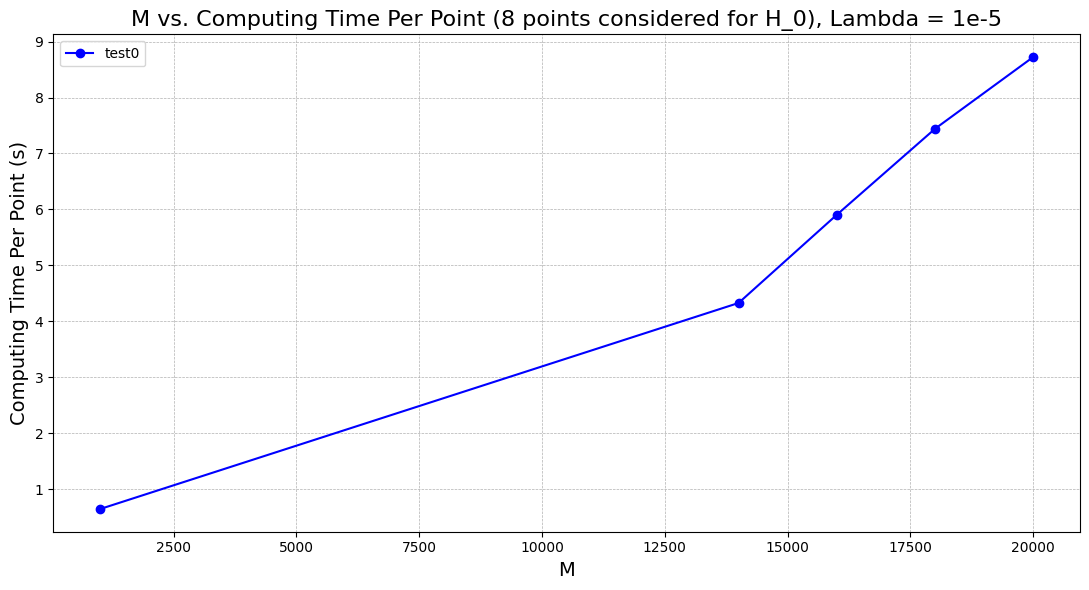

In [17]:
null_hp_times_per_point = {}

color_list = ['b']
label_list = ['test0']


null_hp_times_per_point = null_hp_times/niter_tot
print(null_hp_times_per_point)

plt.figure(figsize=(11, 6))
plt.plot(M_list, null_hp_times_per_point, marker='o', linestyle='-', color = color_list[0], label = label_list[0])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"M vs. Computing Time Per Point ({niter} points considered for H_0), Lambda = 1e-5", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"M_times_lambda=1e-5.pdf", format="pdf")
plt.show()

## Test Statistic fluctuations at varying M 

Average test statistic value for lambda = 1e-5 varying M: [718.920026406356, 1116.0165617991186, 1124.8703036676834, 1132.2745608181065, 1138.2520040760799]
 with std: [36.024979963929965, 40.151719521993485, 40.21174523987515, 40.24362766220959, 40.107533985575635]


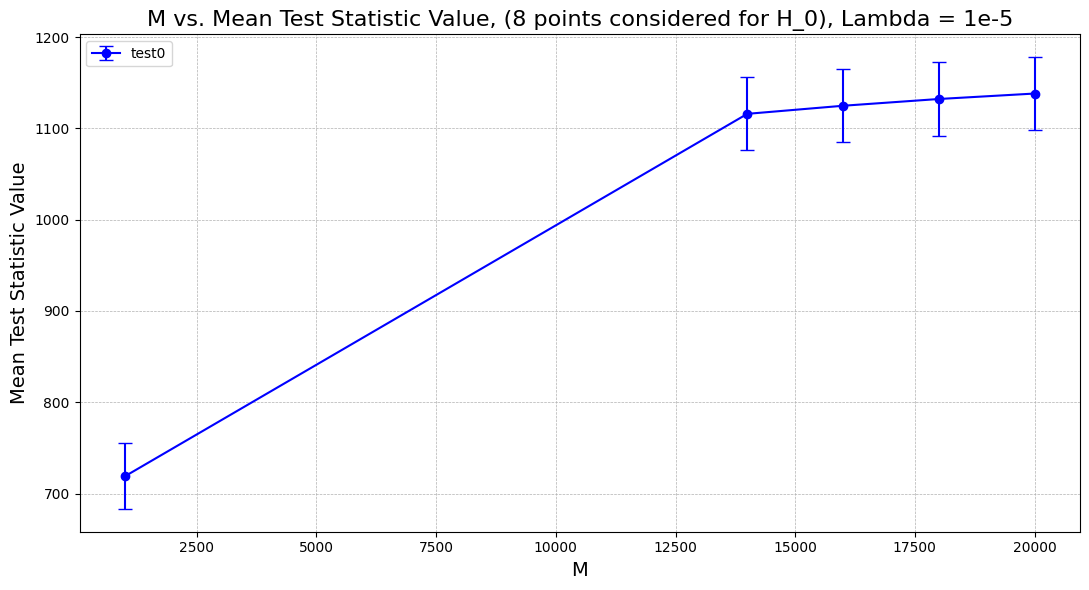

In [18]:
color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}


avg_test_stat = []
std_test_stat = []
for i, m in enumerate(M_list):
    avg_test_stat.append(np.mean(metric_values[i]))
    std_test_stat.append(np.std(metric_values[i]))
print(f"Average test statistic value for lambda = 1e-5 varying M: {avg_test_stat}\n"
        f" with std: {std_test_stat}")

plt.figure(figsize=(11, 6))
plt.errorbar(M_list, avg_test_stat, std_test_stat, capsize=5 ,marker='o', linestyle='-', color = color_list[0], label = label_list[0])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-5", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluctuations_for_lambda=1e-5.pdf", format="pdf")
plt.show()